In [3]:
from collections import OrderedDict

# Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier


# 모델 import
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import statsmodels.formula.api as smf
import statsmodels.api as sm
import graphviz
import pydotplus

# EDA package
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl


# warnings 끄기
warnings.filterwarnings('ignore')

# pandas display option view row & columns
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)

# # matplotlib set
plt.rc('font', family='DejaVu Sans')  # For MacOS
plt.rc('axes', unicode_minus=False)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [ ]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [ ]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [ ]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [ ]:
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [ ]:
# PerformanceRating
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [ ]:
# RelationshipSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [ ]:
# WorkLifeBalance
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [ ]:
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,Excellent,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,Excellent,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Outstanding,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,Excellent,Very High,80,0,17,3,Good,9,6,0,8


In [ ]:
# category column
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)
        print('=============================================================================================')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()
        
print()
print(f'object column의 갯수 : {len(cate_cols)} 개')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']


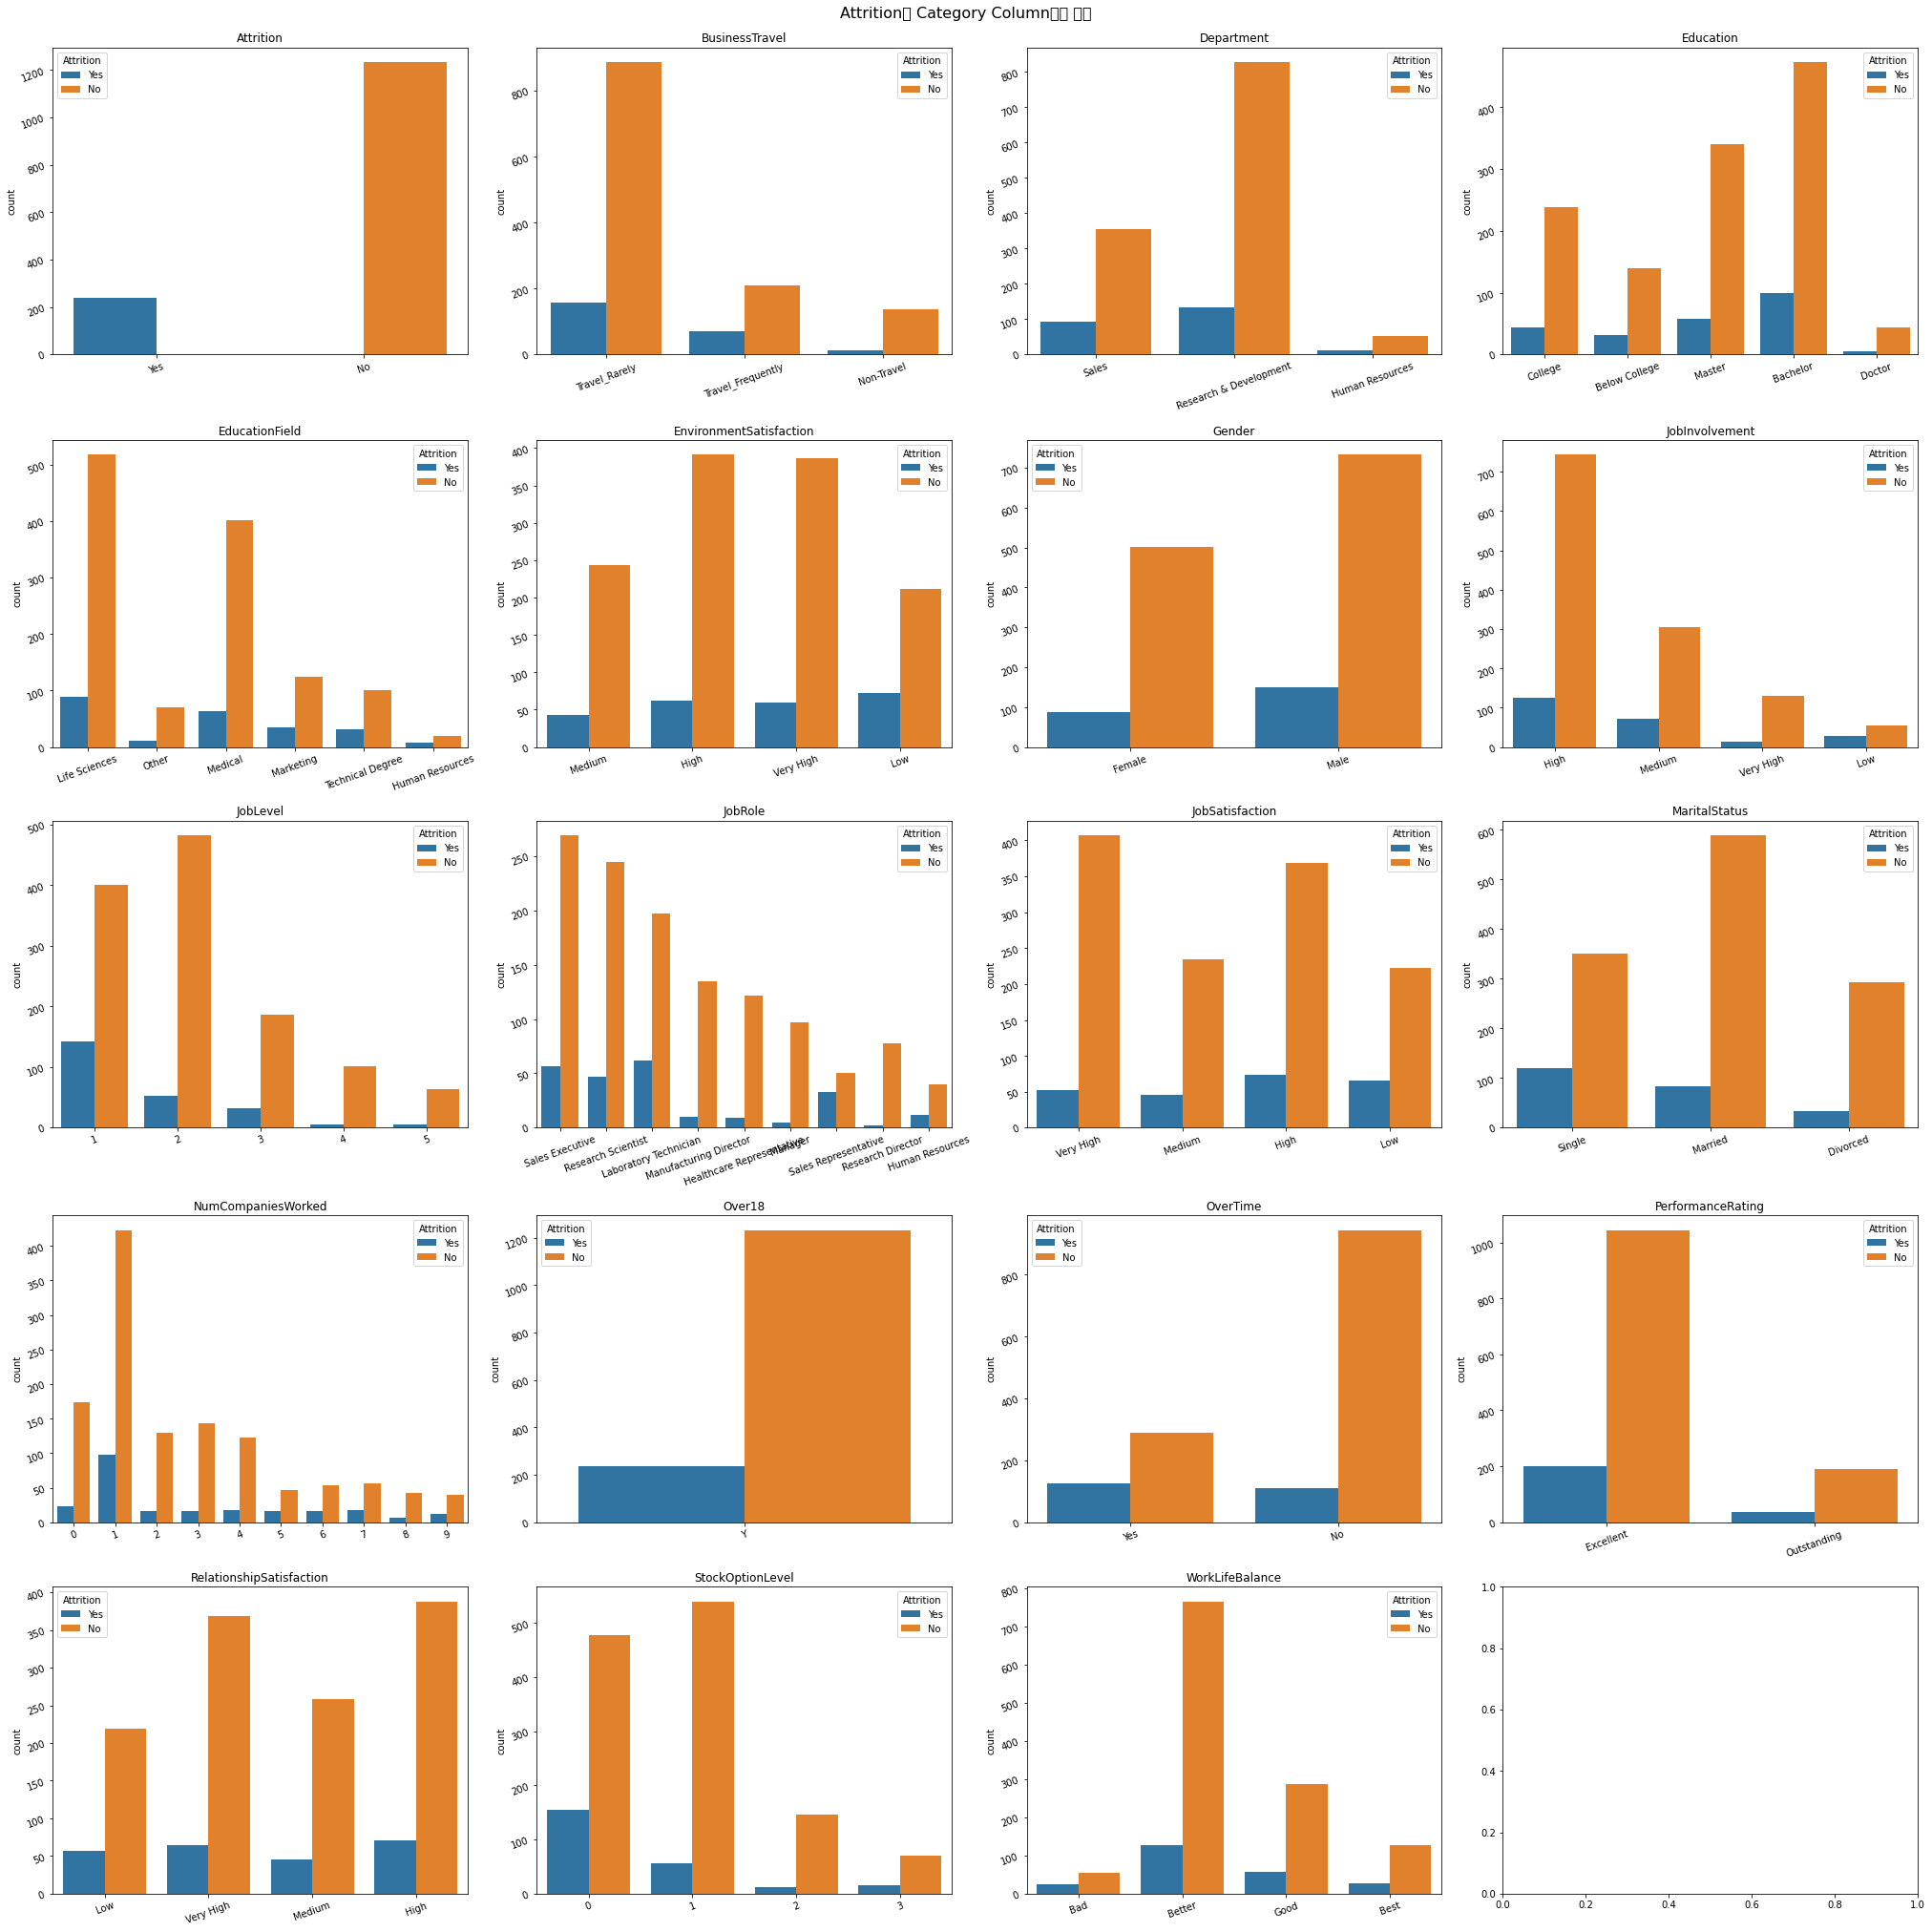

In [ ]:
# category column 그래프로 보기
fig, ax = plt.subplots(5, 4, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 Category Column들의 분포', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=data,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])
    
    if data[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

In [ ]:
# continuous column
cont_cols = []
for column in data.columns:
    if data[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {data[column].nunique()}')
        print('==============================')
print()
print(f'연속형 column의 갯수 : {len(cont_cols)} 개')


Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeCount : 1
EmployeeNumber : 1470
HourlyRate : 71
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
StandardHours : 1
TotalWorkingYears : 40
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18

연속형 column의 갯수 : 16 개


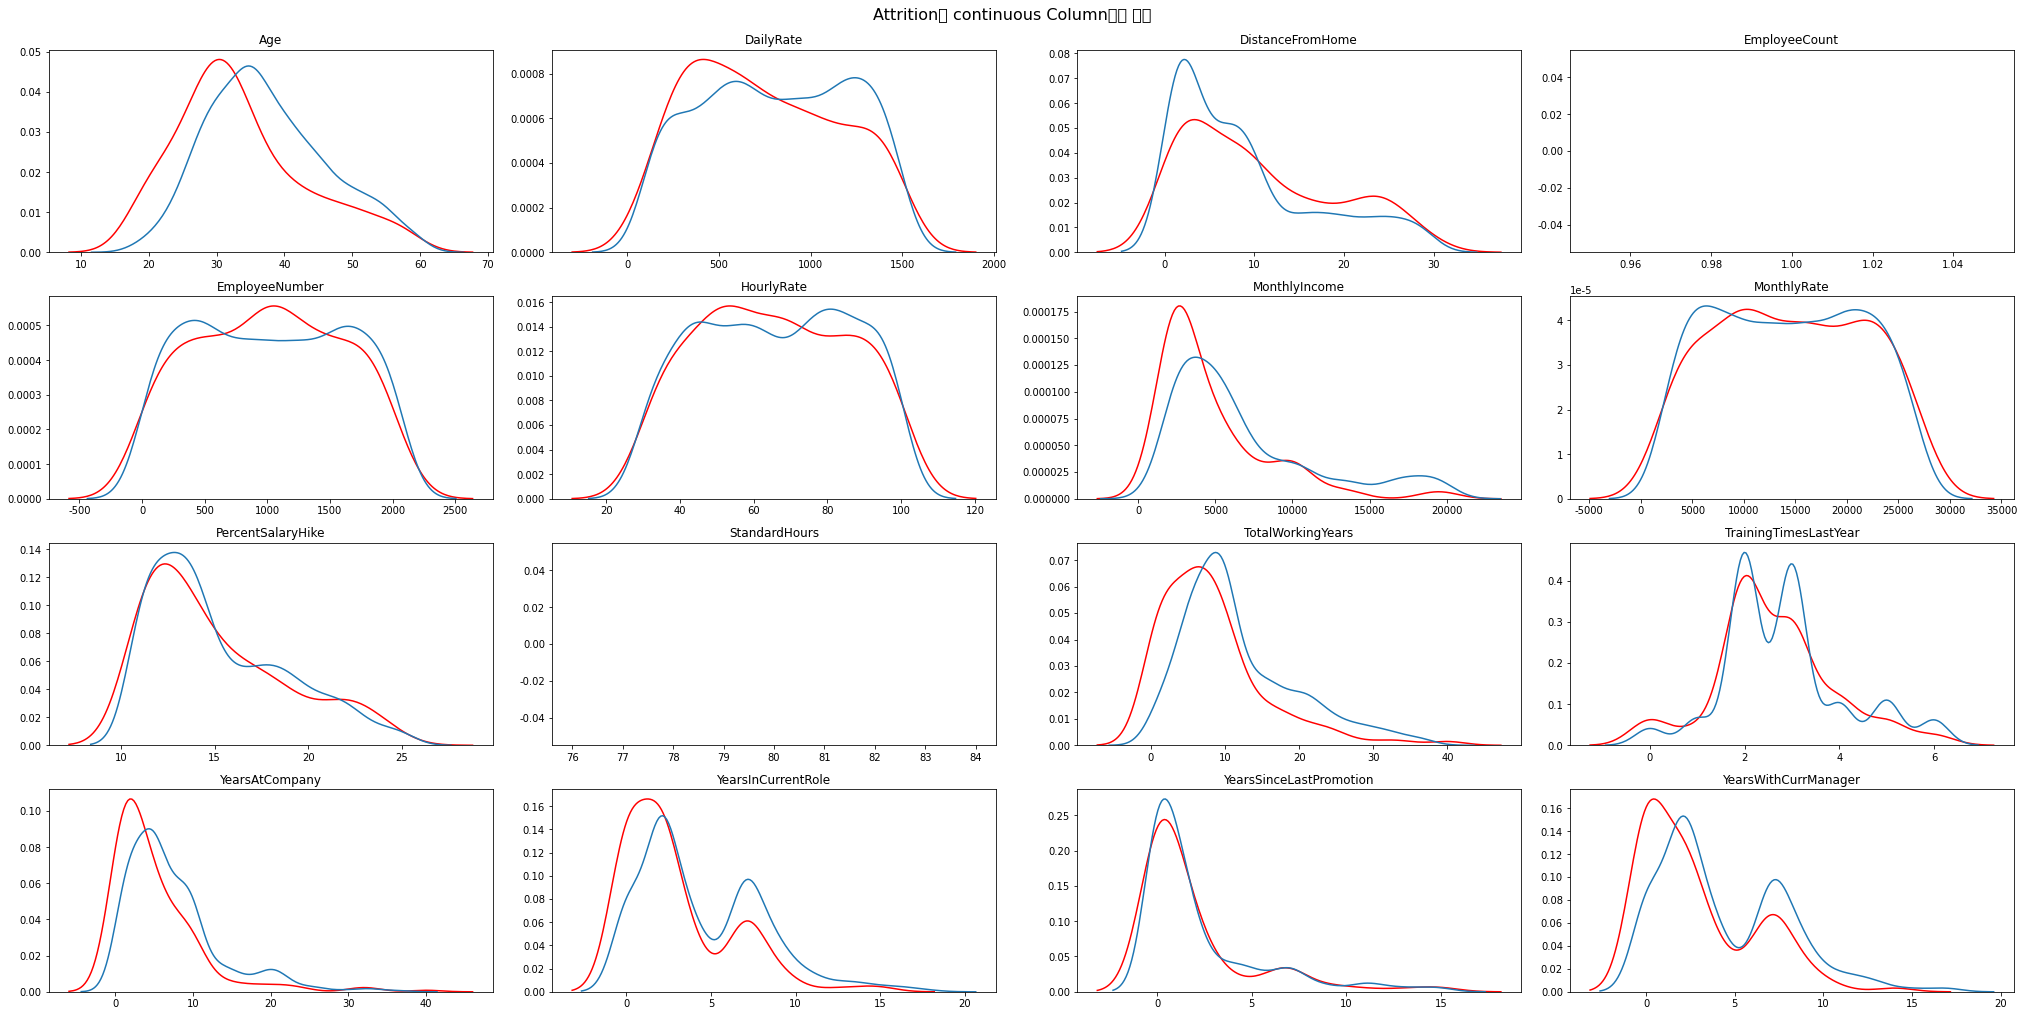

In [ ]:

fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 continuous Column들의 분포', fontsize=16)

for i in range(len(cont_cols)):
    sns.distplot(data[data['Attrition'] == 'Yes'][cont_cols[i]], color='Red', ax=ax[i], hist = False).set(xlabel = None, ylabel = None)
    sns.distplot(data[data['Attrition'] == 'No'][cont_cols[i]], ax=ax[i],hist = False).set(xlabel = None, ylabel = None)
    ax[i].set(title = cont_cols[i])
    
plt.show()

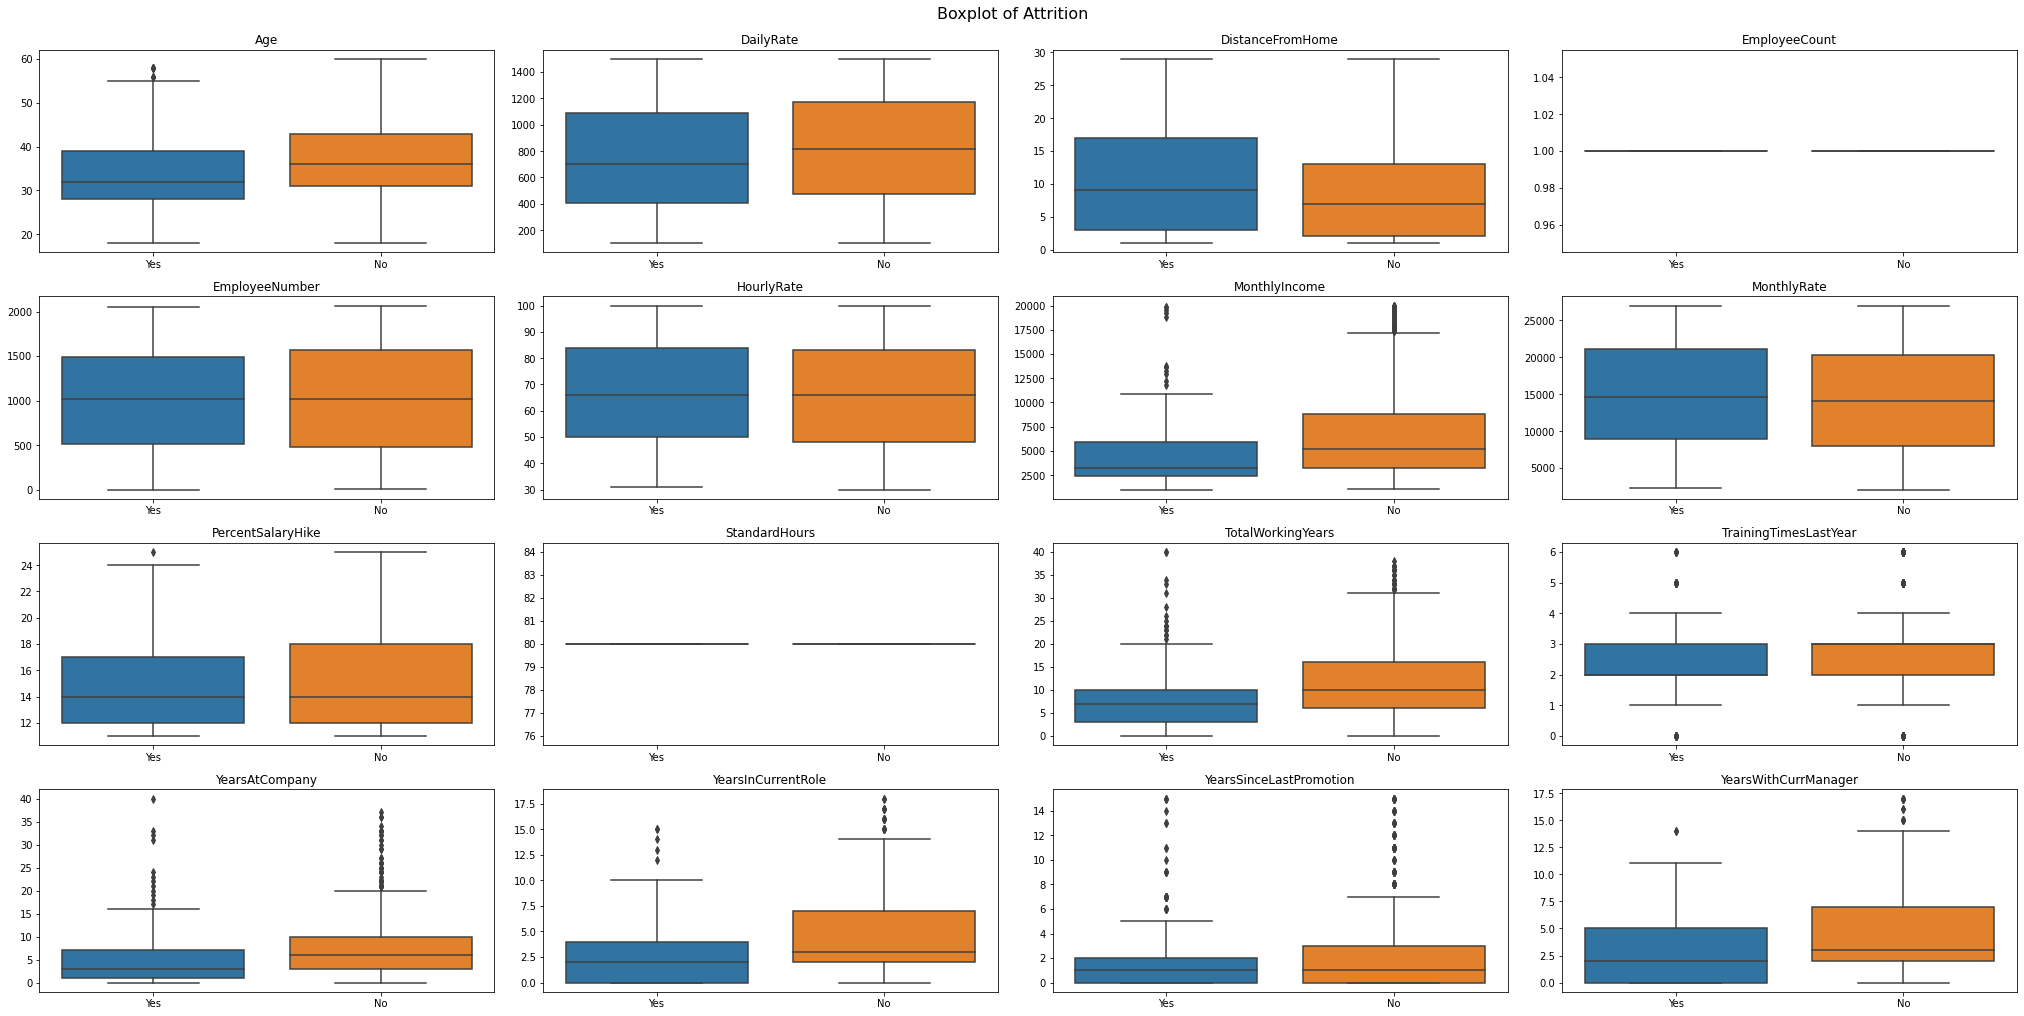

In [ ]:
# boxplot
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=data['Attrition'], y = data[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

In [ ]:
# EmployeeCount, StandardHours, Over18, EmployeeNumber 
print('Over18 :', data['Over18'].unique()[0])
print('EmployeeCount :', data['EmployeeCount'].unique()[0])
print('StandardHours :', data['StandardHours'].unique()[0])
print('EmployeeNumber :', data['EmployeeNumber'].unique()[0])
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
print(data.shape)
data.tail()

Over18 : Y
EmployeeCount : 1
StandardHours : 80
EmployeeNumber : 1
(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,82,Very High,2,Laboratory Technician,High,Married,4404,10228,2,No,12,Excellent,Low,0,6,3,Best,4,3,1,2


In [ ]:
data_cp = data.copy()
data_cp = pd.get_dummies(data_cp, drop_first= True)
data_cp = data_cp[['Attrition_Yes'] + [column for column in data_cp.columns if column != 'Attrition_Yes']]
data_corr = data_cp.corr()
print(data_corr.shape)

(71, 71)


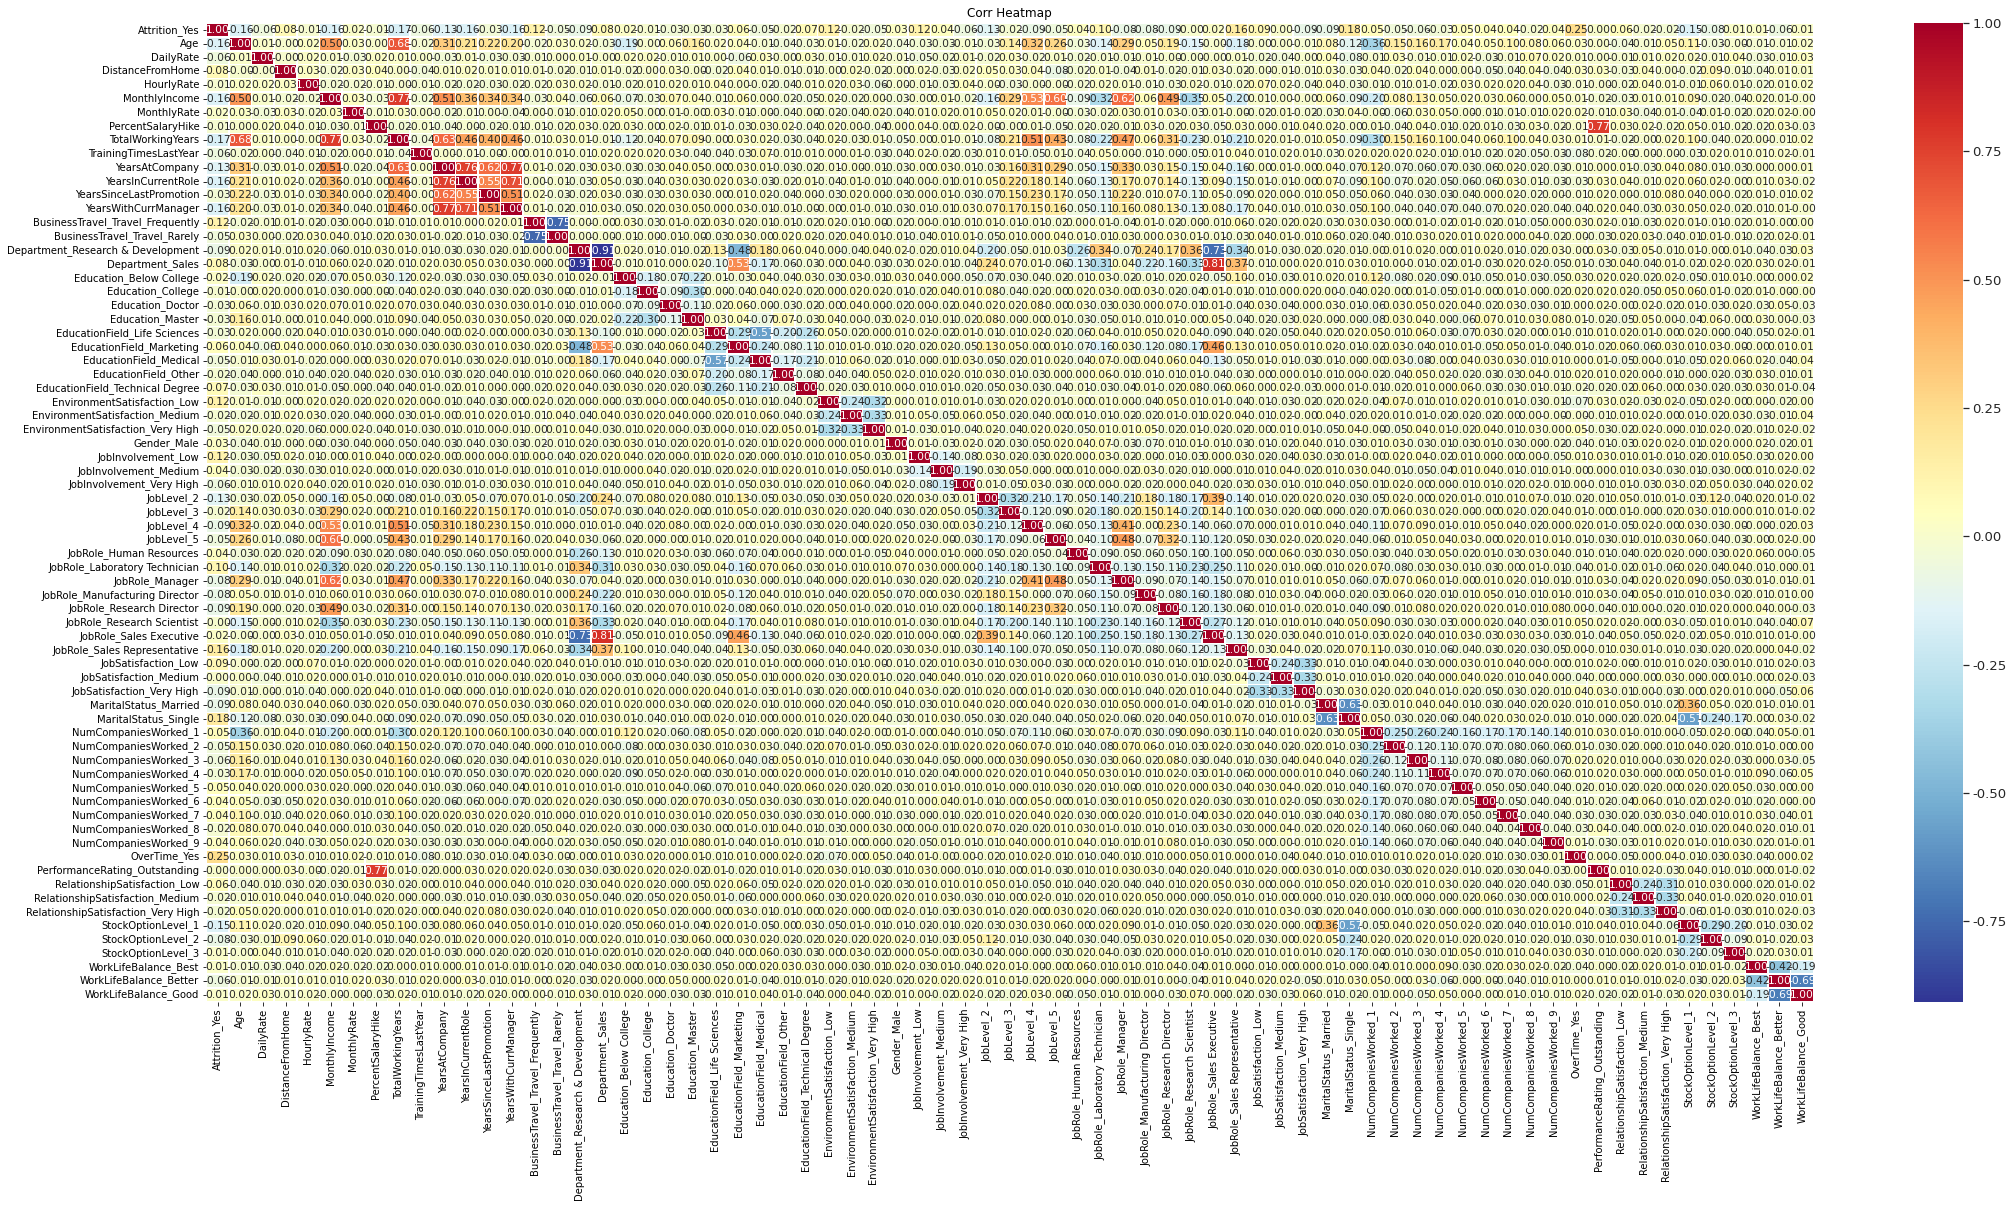

In [ ]:
plt.figure(figsize=(36, 18))
plt.title('Corr Heatmap')

# 실제 히트맵 그리는 코드
sns.set(font_scale=1.2)
sns.heatmap(data_corr, annot=True, annot_kws={
    "size": 90 / np.sqrt(len(data_corr))}, fmt='.2f', cmap='RdYlBu_r', linewidths=0.5,)
plt.savefig('corrmap.png')
plt.show()

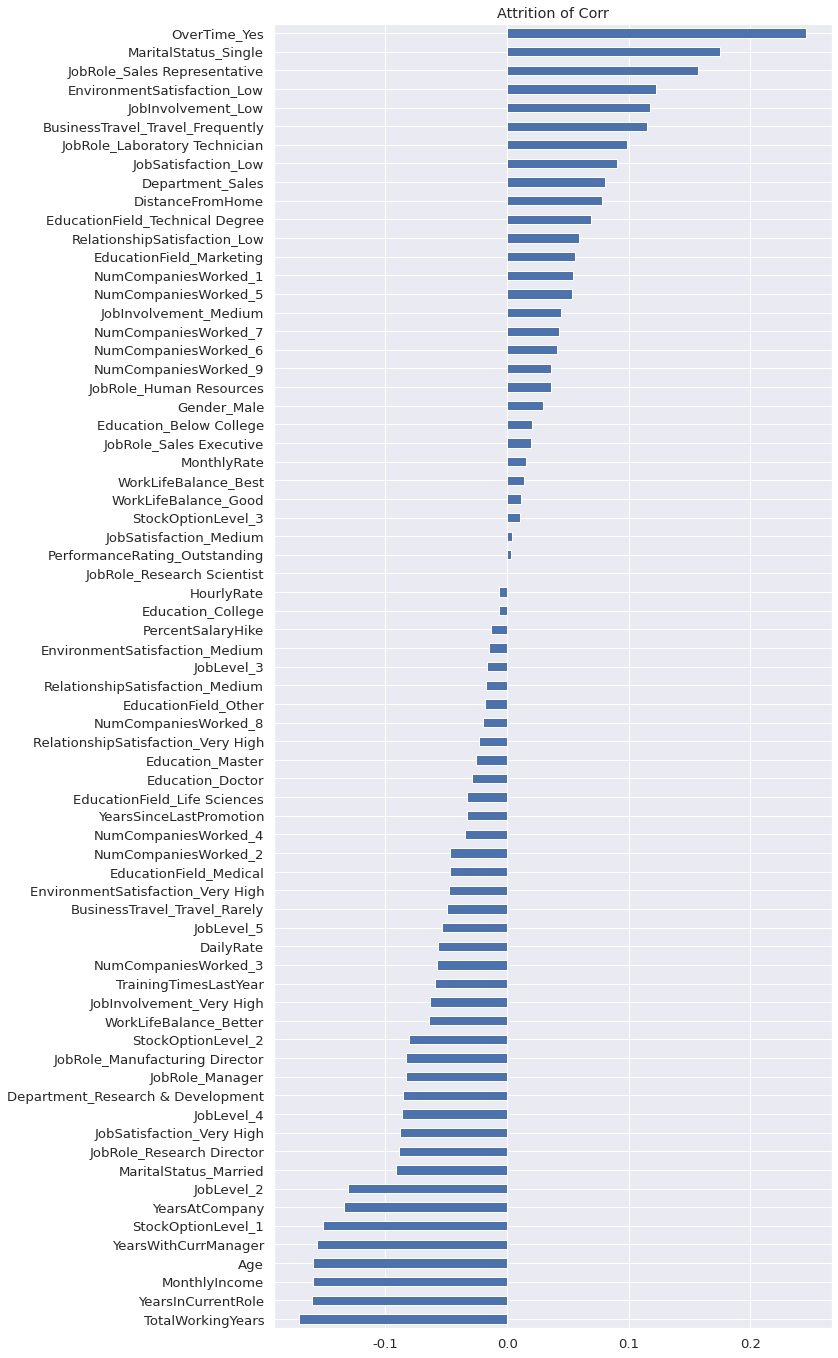

In [ ]:
# 잘안보여서 일단 종속변수 상관관계만 확인
plt.title('Attrition of Corr')
data_cp.drop('Attrition_Yes', axis = 1).corrwith(data_cp.Attrition_Yes).sort_values().plot(kind='barh', figsize = (10, 24))
plt.show()

In [ ]:
# import library
import os, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
import scipy.cluster.hierarchy as sch
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# set figure params (figure size, font size)
plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

In [ ]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:

fig=make_subplots(rows=1, cols=2, 
                  subplot_titles=("", "Employee Attrition by Work Life Balance"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=data['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=data[data.Attrition=='Yes']
plot_df2=plot_df2['WorkLifeBalance'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'WorkLifeBalance'}, inplace=True)
fig.add_trace(go.Pie(labels= ['Poor', 'Neutral', 'Good', 'Excellent'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')      
fig.show()

In [ ]:
plot_df = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis_title='Salary, $', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

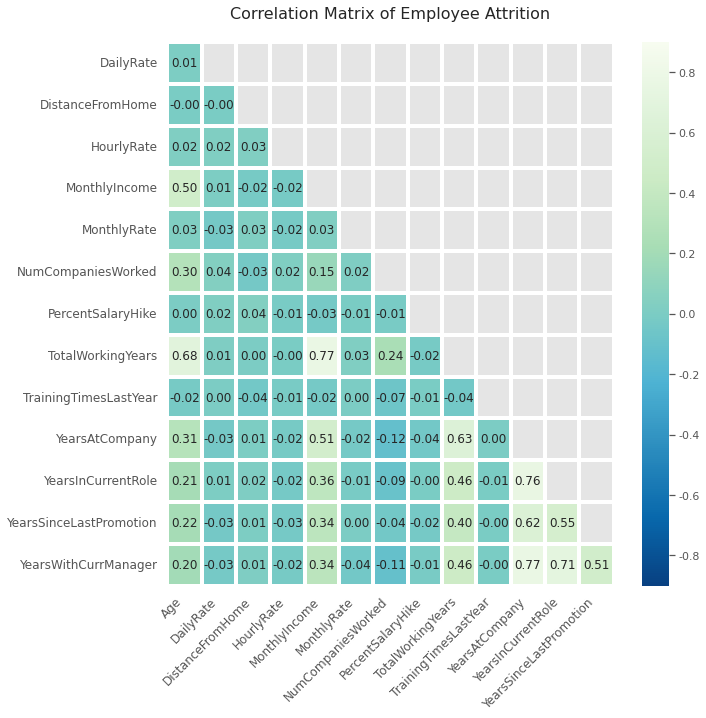

In [ ]:
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)

sns.set_context('notebook')
fig, ax = plt.subplots(figsize=(10,10))   
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=np.bool))
mask=mask[1:, :-1]
corr=corr.iloc[1:,:-1].copy()
ax=sns.heatmap(corr, mask=mask, vmin=-0.9, center=0, vmax=0.9, annot=True, fmt='.2f', linewidths=3,
               cmap='GnBu_r', annot_kws={"fontsize":12})
ax.set_title('Correlation Matrix of Employee Attrition\n', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
fig.show()

In [ ]:
plot_df = data.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( #C18183 #px.colors.qualitative.Set3
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis_title='Monthly Income, $', 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

# Cover-Homo Plot

In [ ]:
# set figure params (figure size, font size)
plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df = data.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [ ]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
num_col = df.drop(columns='Attrition').select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = df.drop(columns='Attrition').select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


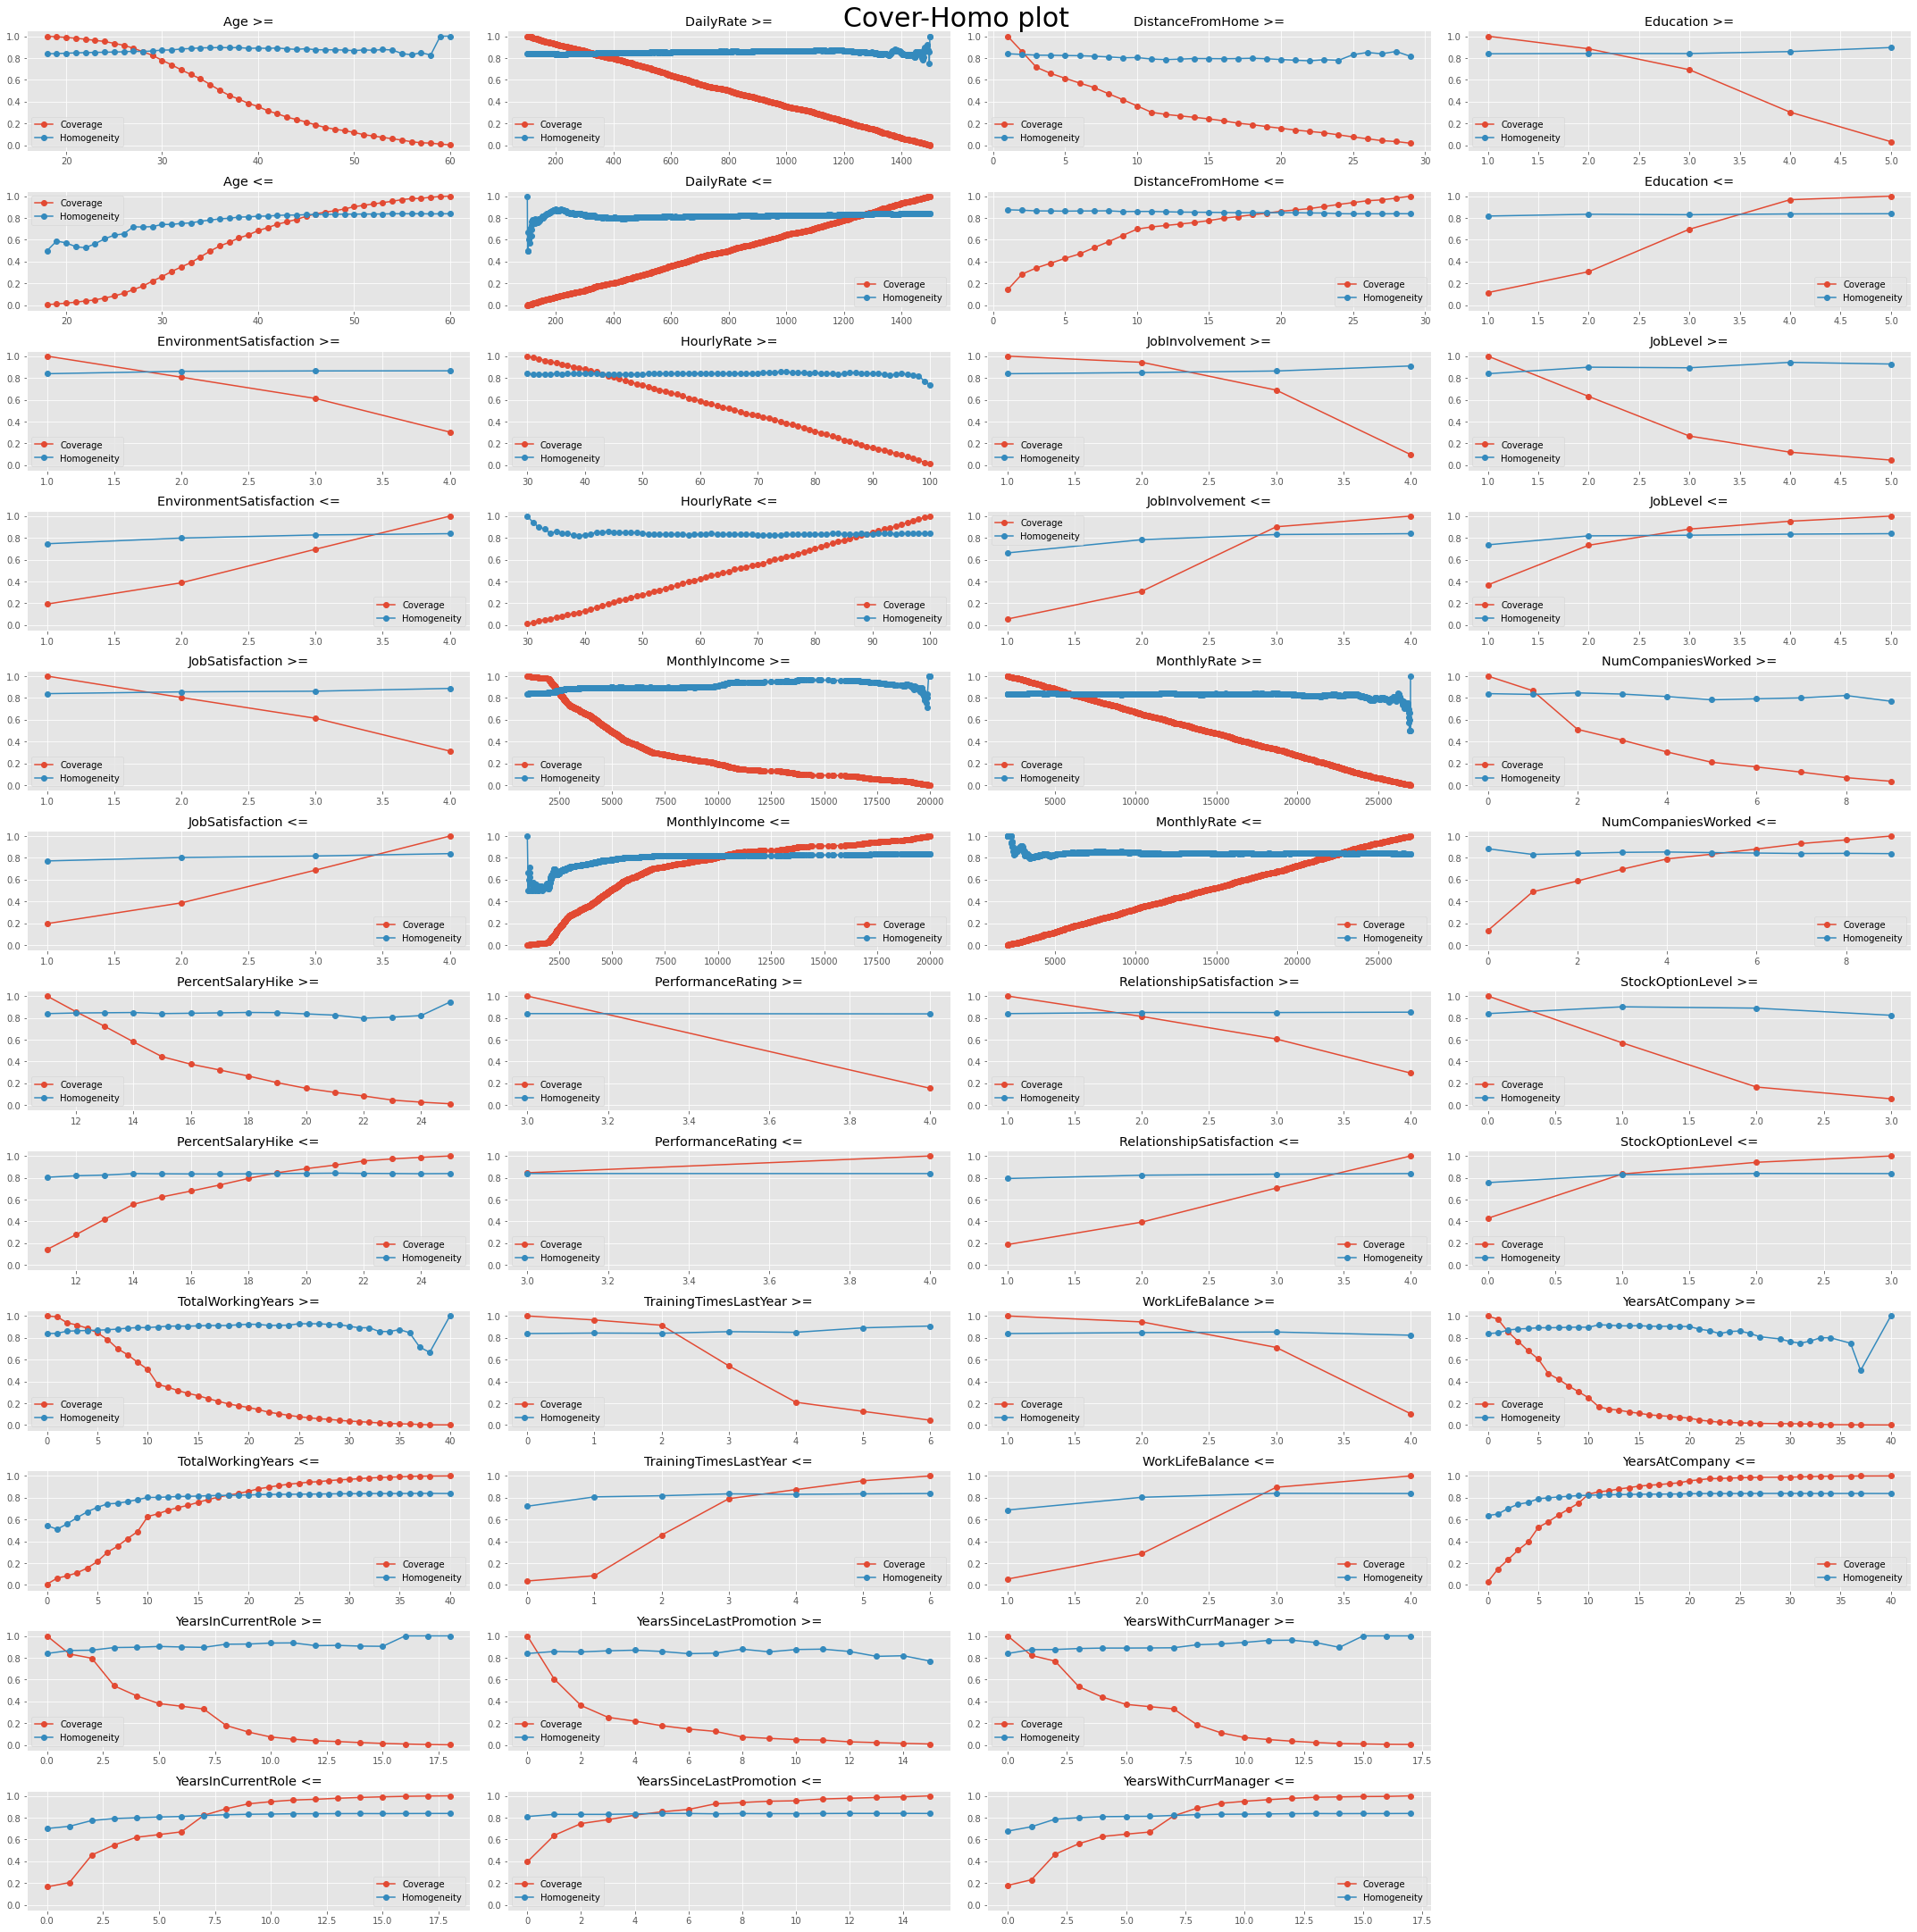

In [ ]:
ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(df, 'Attrition', col, '>=')
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(df, 'Attrition', col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True) # save figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()